Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yutik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yutik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1") # importing the SPAM SMS Collection Dataset

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5493,ham,I think if he rule tamilnadu..then its very to...,NaN,NaN,NaN
5392,ham,Ooooooh I forgot to tell u I can get on yovill...,NaN,NaN,NaN
2404,ham,Please give it 2 or i will pick it up on Tues...,NaN,NaN,NaN
2843,ham,Today iZ Yellow rose day. If u love my frndshi...,NaN,NaN,NaN
3187,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN


# 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop the columns which have very less values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(5)

,v1,v2
413,ham,Bring home some Wendy =D
4823,ham,Not thought bout it... || Drink in tap & spile...
2223,spam,"Thanks for your ringtone order, ref number K71..."
110,ham,What is the plural of the noun research?
1696,ham,"Sorry man, my stash ran dry last night and I c..."


In [7]:
#rename the columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
df.sample(5)

,target,text
4007,ham,"Forgot you were working today! Wanna chat, but..."
3970,spam,Free video camera phones with Half Price line ...
5533,ham,"Hey chief, can you give me a bell when you get..."
3786,ham,WHORE YOU ARE UNBELIEVABLE.
3772,ham,I came hostel. I m going to sleep. Plz call me...


In [9]:
#converting text to numeric values.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target']) 

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# check for any missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

409

In [14]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5163, 2)

# 2. EDA

In [17]:
df['target'].value_counts() # 0 => ham and 1 => spam

0    4516
1     647
Name: target, dtype: int64

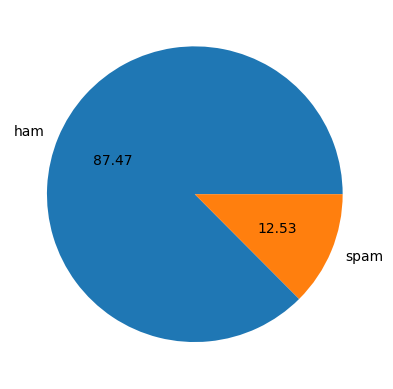

In [18]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
# Data is imbalanced

In [21]:
#length of message

df['num_char'] = df['text'].apply(len)

In [22]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# numbers of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # breaking sms into words and counting the length of the list

In [24]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#count the number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
#description / summary
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.606624,2.015107
std,58.153491,13.416336,1.484312
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,116.000000,26.000000,3.000000
max,910.000000,220.000000,38.000000


In [28]:
#description for ham messages
df[df['target']==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.241585,1.876661
std,56.356310,13.549707,1.430122
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#description for spam messages
df[df['target']==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,647.000000,647.000000,647.000000
mean,137.318393,28.134467,2.981453
std,30.096861,7.154996,1.497044
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,223.000000,47.000000,9.000000


<AxesSubplot: xlabel='num_char', ylabel='Count'>

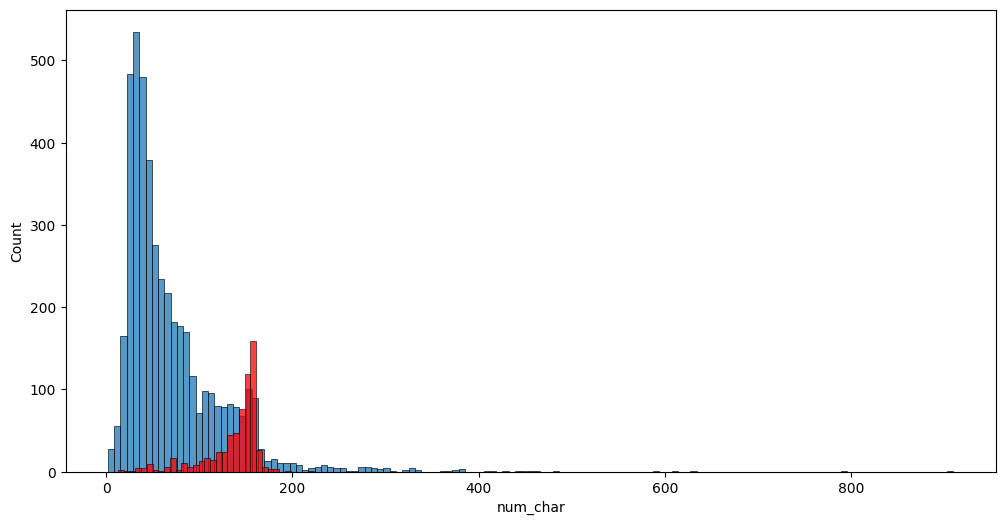

In [36]:
# visualizing usng histogram
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char']) #ham
sns.histplot(df[df['target']==1]['num_char'],color='red') #spam

<AxesSubplot: xlabel='num_words', ylabel='Count'>

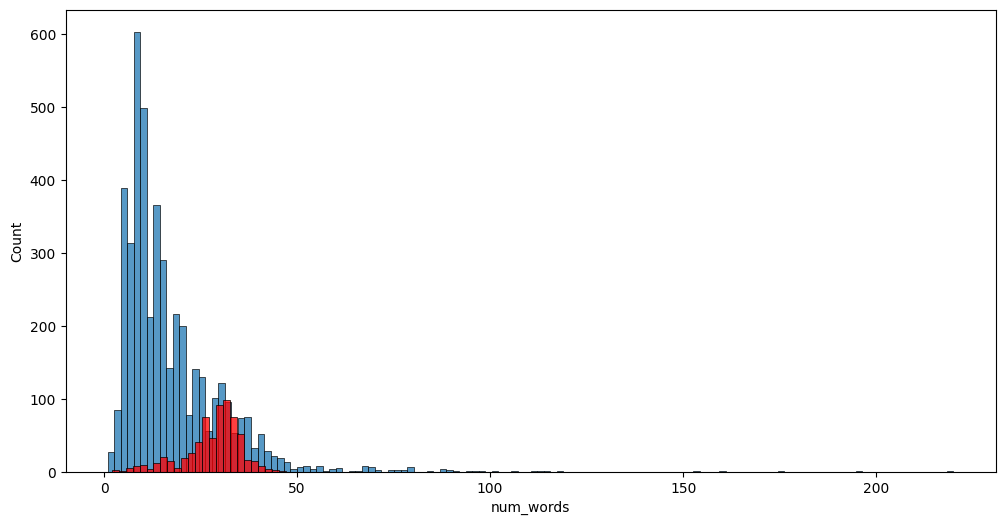

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words']) #ham
sns.histplot(df[df['target']==1]['num_words'],color='red') #spam

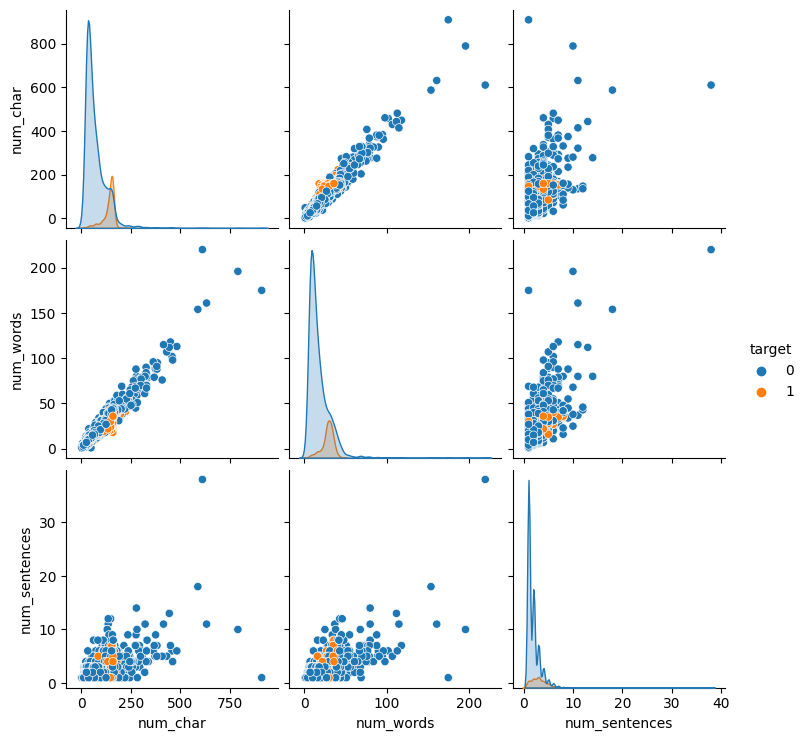

In [39]:
sns.pairplot(df,hue='target') #relation between characters, words and sentences

C:\Users\Yutik\AppData\Local\Temp\ipykernel_6452\1279228754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

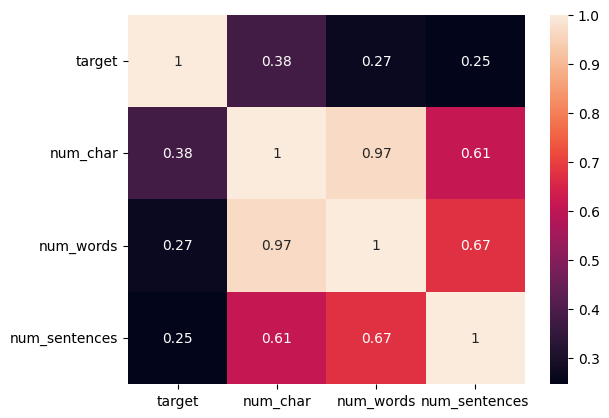

In [40]:
#correlation coefficient
sns.heatmap(df.corr(),annot=True)

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# 3. Data Preprocessing
Lowercase 
Tokenization 
Removing special characters
Removing stop words and punctuation 
Stemming

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
def transform_text(text):
    text = text.lower()                         # lowercase
    text = nltk.word_tokenize(text)             #tokenization i.e. converting into words
    
    y=[]
    for i in text:                              #Removing special characters
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [44]:
transform_text("I loved the YT lectures on Machine Learning. How about You?")

'love yt lectur machin learn'

In [45]:
df['transformed_test']=df['text'].apply(transform_text) # transforming the text using the function we made.


In [46]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_test
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
# Creating Word cloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [48]:
spam_wc = wc.generate(df[df['target']==1]['transformed_test'].str.cat(sep=" "))  #creating wordcloud for spam words

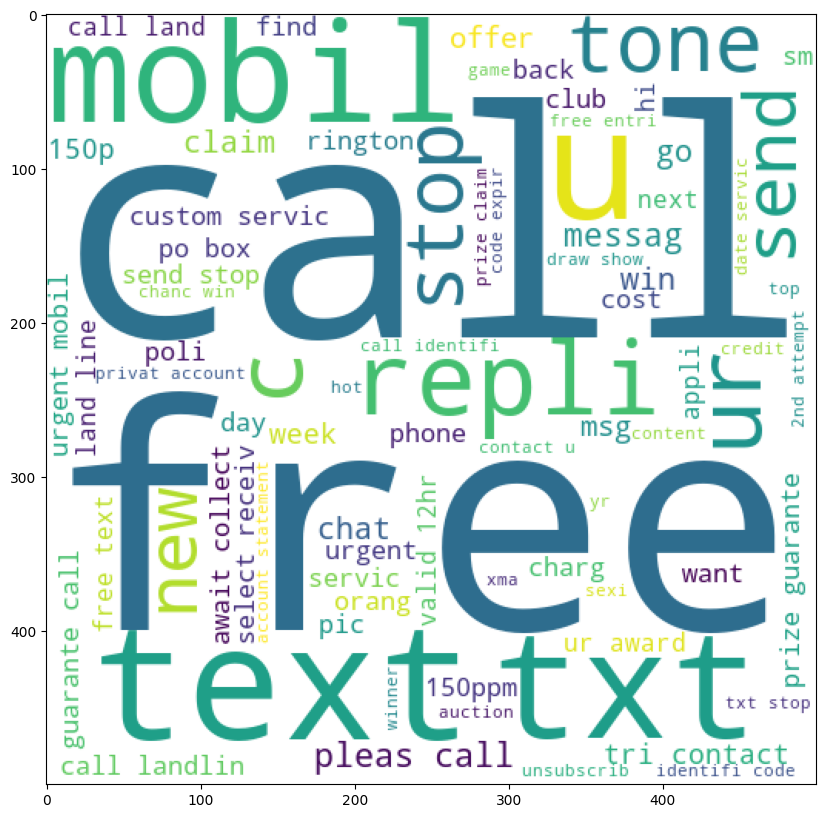

In [49]:
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.generate(df[df['target']==0]['transformed_test'].str.cat(sep=" "))  #creating wordcloud for ham words

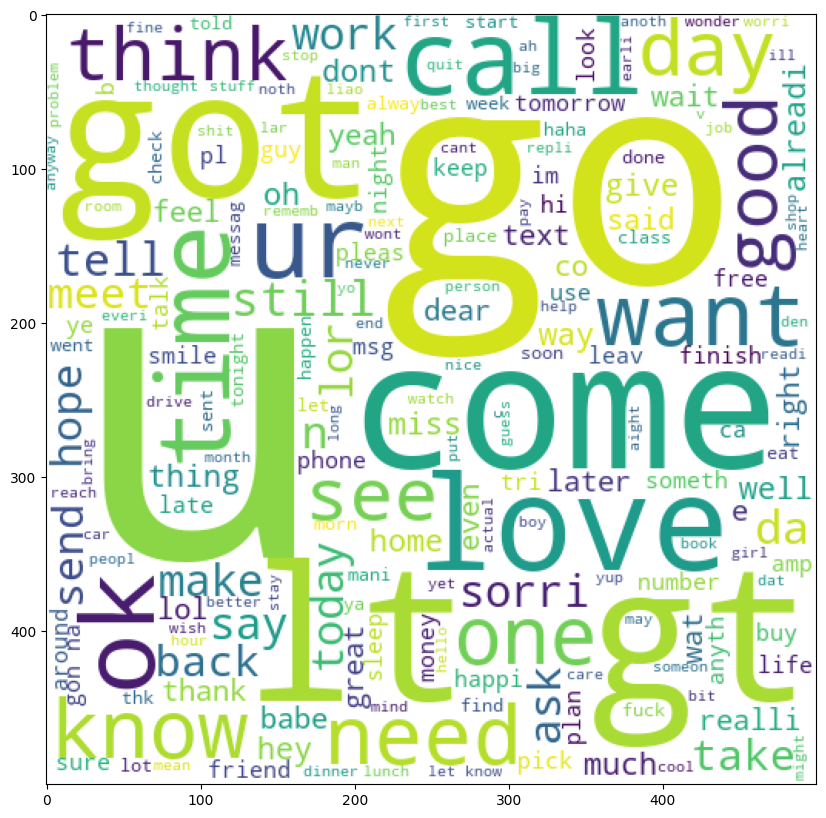

In [51]:
plt.figure(figsize=(15,10))
plt.imshow(ham_wc)

In [52]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_test'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)


10067

In [54]:
from collections import Counter

In [55]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,321
1,free,188
2,2,155
3,txt,140
4,text,122
5,ur,119
6,u,118
7,mobil,110
8,stop,104
9,repli,103


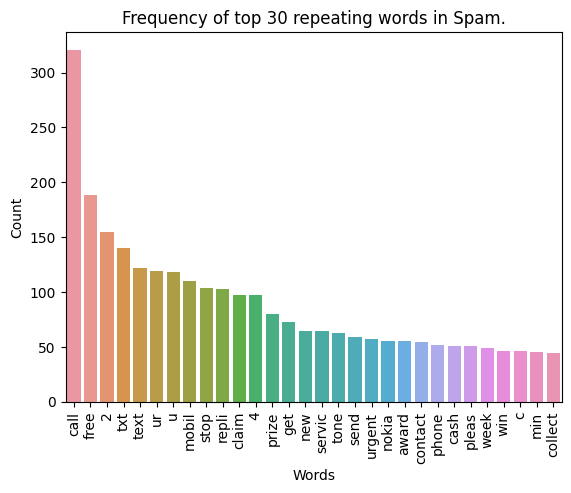

In [58]:
import seaborn as sns
ax=sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
ax.set(xlabel='Words')
ax.set(ylabel="Count")
ax.set_title("Frequency of top 30 repeating words in Spam.")
plt.show()

In [59]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_test'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35336

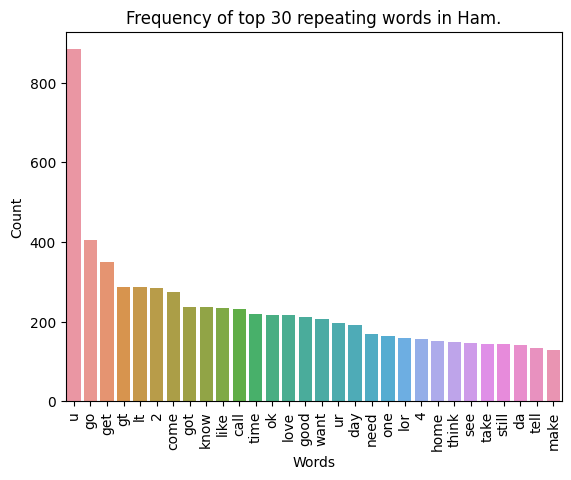

In [61]:
ax=sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
ax.set(xlabel='Words')
ax.set(ylabel="Count")
ax.set_title("Frequency of top 30 repeating words in Ham.")
plt.show()

# 4. Model Building

In [62]:
 # Vectorization of textual data
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer # bag of words,tfidf

cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=5900)

In [63]:
x = tfidf.fit_transform(df['transformed_test']).toarray()

In [64]:
x.shape

(5163, 5900)

In [65]:
y = df['target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8635043562439496
[[786 126]
 [ 15 106]]
0.45689655172413796


In [72]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9632139399806389
[[912   0]
 [ 38  83]]
1.0


In [73]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709583736689255
[[909   3]
 [ 27  94]]
0.9690721649484536


In [74]:
# testing differernt algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [75]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)

In [76]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'LR':lrc,
    'RF':rfc,
    'ETC':etc
}

In [77]:
# function returns accuracy and precision.
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [78]:
accuracy_scores =[]
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("====================================")
        
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.972894482090997
Precision -  0.9696969696969697
For  KN
Accuracy -  0.9070667957405615
Precision -  1.0
For  NB
Accuracy -  0.9632139399806389
Precision -  1.0
For  LR
Accuracy -  0.9535333978702807
Precision -  0.9397590361445783
For  RF
Accuracy -  0.972894482090997
Precision -  1.0
For  ETC
Accuracy -  0.9806389157792836
Precision -  1.0


In [79]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [80]:
performance_df #accuracy and precision of various algorithm

,Algorithm,Accuracy,Precision
1,KN,0.907067,1.000000
2,NB,0.963214,1.000000
4,RF,0.972894,1.000000
5,ETC,0.980639,1.000000
0,SVC,0.972894,0.969697
3,LR,0.953533,0.939759


In [82]:
# we will go with tfidf -> etc
#Creating a pipeline and converting it into a website
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))